# Cifar10 데이터 다운 (TensorFlow, keras)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np  # 행렬같은 다차원 데이터를 쉽게 처리하기 위한 라이브러리
import matplotlib.pyplot as plt  # 그래프나 이미지등을 표현하기 위한 라이브러리
from sklearn.metrics import confusion_matrix, classification_report
from keras.datasets import cifar10
from sklearn.manifold import TSNE
from sklearn import decomposition
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import pandas as pd
from sklearn.decomposition import PCA
import os


In [ ]:
# tensorflow, keras 버전 확인
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
# cifar10 데이터 download
cifar10 = keras.datasets.cifar10

# 다운받은 데이터 각각 load, 0~1 정규화
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# train/test dataset shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


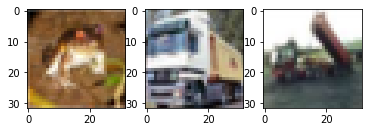

In [ ]:
 # cifar10 데이터셋 3개정도 가시화
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(x_train[0])
ax2.imshow(x_train[1])
ax3.imshow(x_train[2])

plt.show()

In [ ]:
# 가시화한 3개의 데이터셋의 label
print(y_train[:3])

[[6]
 [9]
 [9]]


In [ ]:
x_train[0].shape
# y_train.shape

(32, 32, 3)

## 초기데이터 PCA
# https://github.com/rnoxy/cifar10-cnn/blob/master/CIFAR10-visualization.ipynb

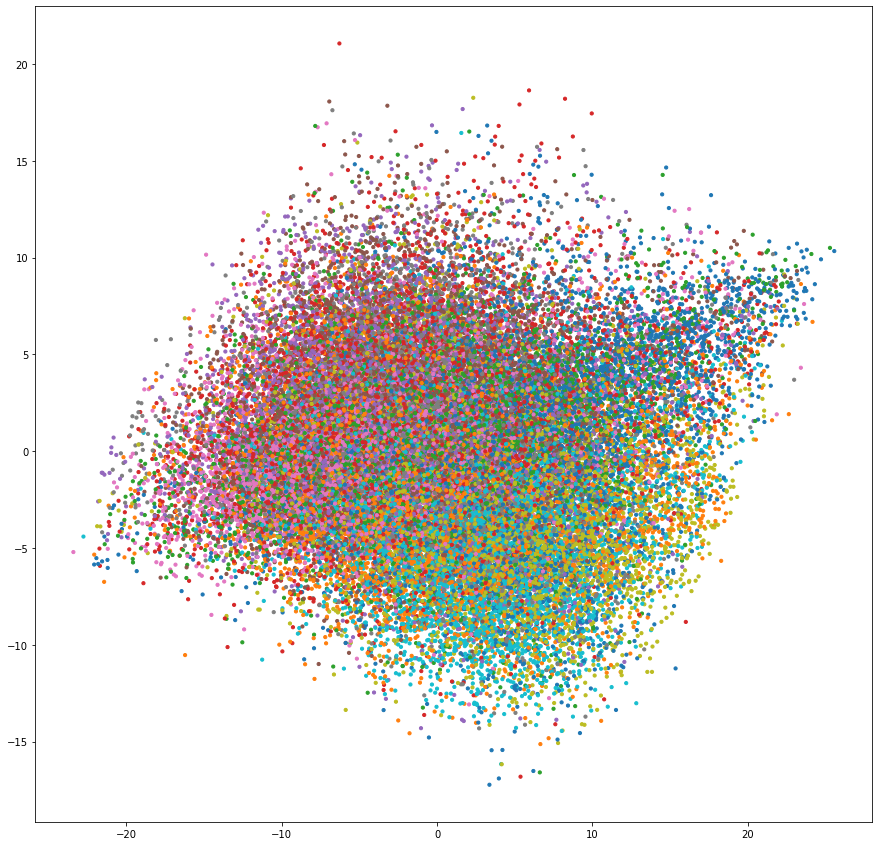

In [17]:
nsamples = 50000
features = np.array( [ x_train[i].flatten() for i in range(nsamples)] )
labels   = np.array( [ y_train[i] for i in range(nsamples)])

pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)

plt.figure( figsize=(15,15) )
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='tab10', s=10)
plt.show()

## 초기데이터 t-SNE
### 50000장의 데이터를 순수히 t-SNE에 돌리면 너무 오래 걸림
### 따라서, PCA로 차원축소 후 t-SNE로 돌림
### (PCA로 30차원으로 축소 후 t-SNE, 14분 걸림)

In [ ]:
pca = decomposition.PCA(n_components=30)
pca_data = pca.fit_transform(features)

tsne = TSNE(learning_rate=300, n_components=2)
X = tsne.fit_transform(pca_data)

# colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k', 'w', 'lime','violet']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
# CNN전이라 feature space를 시각화하면 feature가 난잡하게 섞여있음
plt.figure( figsize=(15,15) )
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
plt.legend(*scatter.legend_elements(num=10), loc="upper left")
plt.show()

# ANN

In [ ]:
# # 모델
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(32,32,3)),
#   tf.keras.layers.Dense(3000, activation='relu'),
#   tf.keras.layers.Dense(3000, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# # 모델 정보 출력
# model.summary()

In [ ]:
# # 배치 사이즈 & 사용할 optimizer, loss funtion, 평가 메트릭
# batch_size = 64
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# # log directory
# log_dir = './logs/tensorflow'

# tensorboard_cb = keras.callbacks.TensorBoard(log_dir)

In [ ]:
# # Training / Evaluation
# # model.fit(x_train, y_train, batch_size=batch_size , epochs=10, callbacks=[tensorboard_cb])
# model.fit(x_train, y_train, epochs=10)

In [ ]:
# 이후 터미널에서 tensorboard --logdir=./logs/tensorflow 실행!
# http://localhost:6006/

In [ ]:
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# print("\nTest Accuracy :", test_acc)
# print("Test Loss : ", test_loss)

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(x_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# CNN
# https://youtu.be/7HPwo4wnJeA

In [2]:
# x_train, y_train 다시 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# 레이블링
cifar10_label = [
  'airplane',									
  'automobile',								
  'bird',								
  'cat',								
  'deer',								
  'dog',								
  'frog',								
  'horse',								
  'ship',								
  'truck'
]
# cifar10_label = {
#     0: 'airplane',
#     1: 'automobile',
#     2: 'bird',
#     3: 'cat',
#     4: 'deer',
#     5: 'dog',
#     6: 'frog',
#     7: 'horse',
#     8: 'ship',
#     9: 'truck',
# }

## CNN modeling

In [ ]:
# cnn = tf.keras.models.Sequential([
#   #cnn
#   tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
#   tf.keras.layers.MaxPool2D(3,3),

#   tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#   tf.keras.layers.MaxPool2D(2,2),
  
#   tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#   tf.keras.layers.MaxPool2D(2,2),

#   tf.keras.layers.Flatten(), #Flatten을 통해 fully connected layer가 된다.
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# # 배치 사이즈 & 사용할 optimizer, loss funtion, 평가 메트릭
# batch_size = 64
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.GlobalAveragePooling2D())

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0

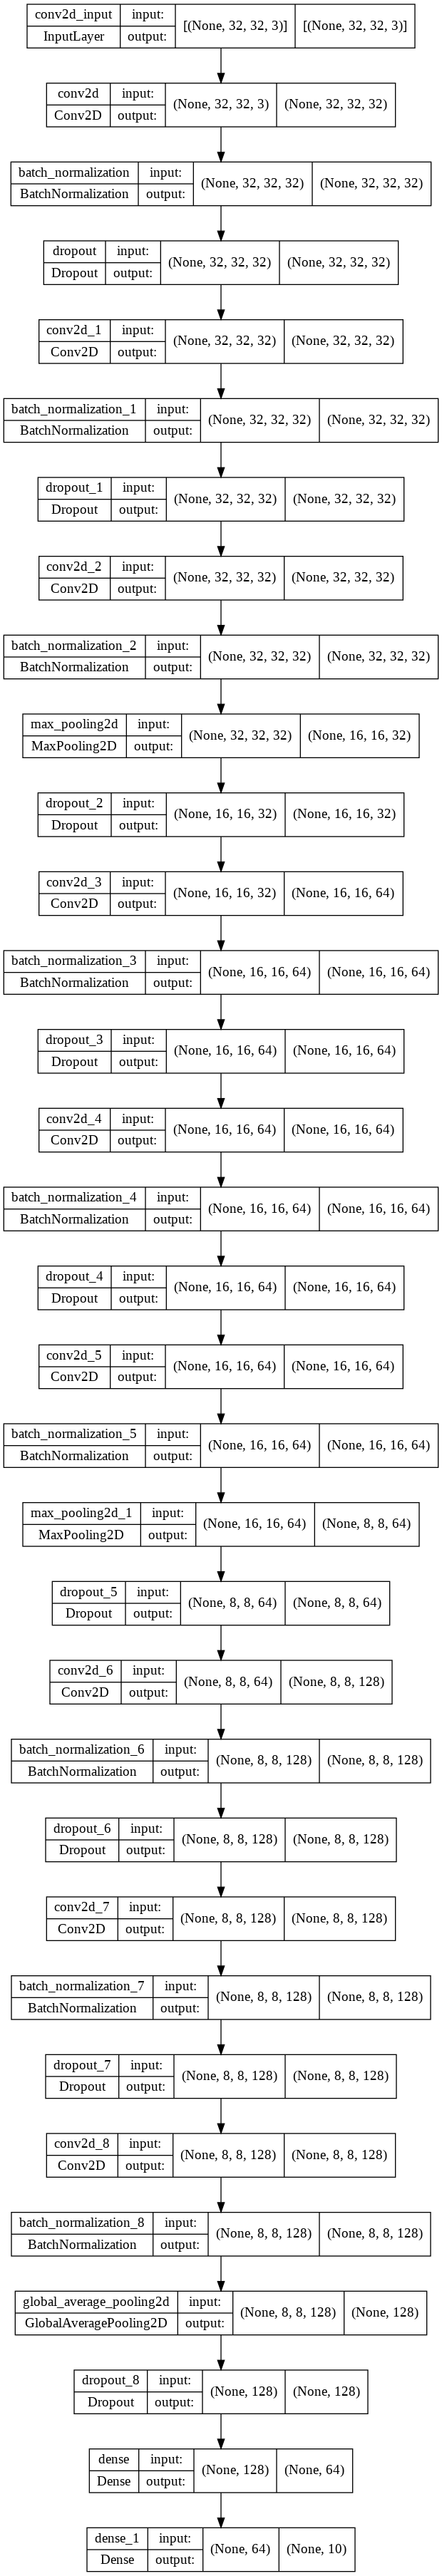

In [ ]:
# CNN 구조 요약
cnn.summary()
# CNN 구조를 도식화
plot_model(cnn, show_shapes=True, show_layer_names=True, to_file='cnn.png')
Image(retina=True, filename='cnn.png')

## CNN fitting

In [5]:
# CNN으로 학습
epoch_count = 3
y_pred_now = [0] * epoch_count
# cnn_info = [0] * epoch_count
cnn_info = cnn.fit(x_train, y_train, epochs=epoch_count, validation_data=(x_test, y_test),batch_size=256)

# epoch가 20쯤 넘어가니까 학습하다 GPU RAM(VRAM) 터져서 코드 수정했음
# for i in range(0, epoch_count):
#   print("epochs : %s / %s" %(i+1, epoch_count))
#   cnn_info[i] = cnn.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test),batch_size=256)

#   # epoch 마다 plot을 show하기 위한 코드
#   y_pred_now.insert(i, cnn.predict(x_test)) 

Epoch 1/3
196/196 [==============================] - 27s 55ms/step - loss: 1.5355 - accuracy: 0.4288 - val_loss: 4.3810 - val_accuracy: 0.1115
Epoch 2/3
196/196 [==============================] - 10s 49ms/step - loss: 1.1254 - accuracy: 0.5919 - val_loss: 2.5707 - val_accuracy: 0.2930
Epoch 3/3
196/196 [==============================] - 10s 50ms/step - loss: 0.9559 - accuracy: 0.6564 - val_loss: 1.0377 - val_accuracy: 0.6414


## CNN 결과

In [ ]:
history_df = pd.DataFrame(cnn_info.history)
print(history_df)        

        loss  accuracy  val_loss  val_accuracy
0   1.729595   0.37392  1.464916        0.4799
1   1.391182   0.50446  1.387280        0.5182
2   1.269388   0.55414  1.214041        0.5705
3   1.183055   0.58590  1.152237        0.5946
4   1.117484   0.60996  1.094285        0.6167
..       ...       ...       ...           ...
95  0.207436   0.92878  1.393707        0.7122
96  0.209740   0.92886  1.442802        0.7002
97  0.200602   0.93218  1.450277        0.7077
98  0.199378   0.93128  1.460734        0.7023
99  0.199422   0.93190  1.472531        0.7091

[100 rows x 4 columns]


In [ ]:
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=1)

print("\nTest Accuracy :", test_acc)
print("Test Loss : ", test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.8476

Test Accuracy : 0.847599983215332
Test Loss :  0.4659682512283325


In [ ]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.76      0.80      0.78      1000
           3       0.70      0.74      0.72      1000
           4       0.89      0.78      0.83      1000
           5       0.84      0.73      0.78      1000
           6       0.80      0.93      0.86      1000
           7       0.91      0.87      0.89      1000
           8       0.95      0.89      0.92      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## CNN T-SNE
### 시간절약을 위해 PCA로 전처리 후 T-SNE를 돌림

In [ ]:
# # 각 epoch마다 t-SNE 시각화 하는 코드
# # 돌리고 싶으면 epoch=1씩 학습해서 cnn_info 배열을 쓰면되나..
# # 조교 답변에의해 그럴 필요가 없던걸로.

# # epoch=20일 때, pca -> t-SNE로 22분 걸림
# # 발표자료로 쓰는경우 제외하면 PCA로 돌리기 (시간 절약)
# for i in range(0, epoch_count):
#   pca = decomposition.PCA()#n_components=10)
#   pca_data = pca.fit_transform(y_pred_now[i])

#   X = pca_data
#   # tsne = TSNE(learning_rate=300)
#   # X = tsne.fit_transform(pca_data)

#   fig, ax = plt.subplots(figsize=(7, 7))

#   scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=1, cmap='tab10')
#   legend = ax.legend(*scatter.legend_elements(num=10), loc="upper left")
#   ax.set_title("epochs %s" % str(i+1))
#   ax.add_artist(legend)

### x_train으로 T-SNE
#### 15분 가량 소요

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


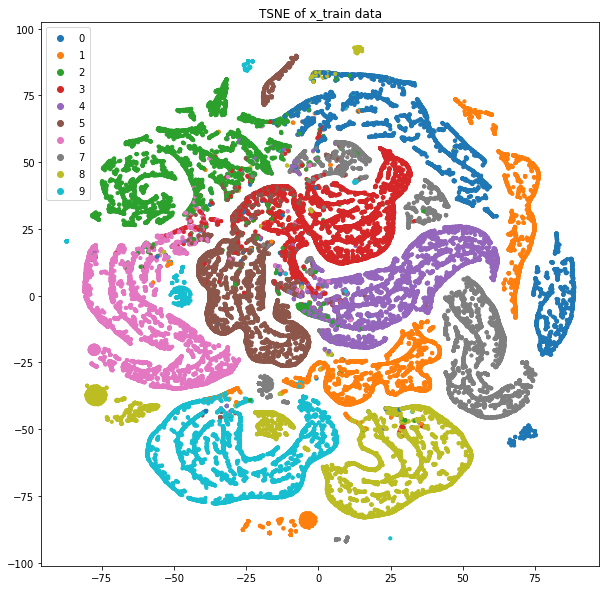

In [ ]:
nsamples = 50000
# features = features = np.array( [ x_train[i].flatten() for i in range(nsamples)])
labels = np.array( [ y_train[i] for i in range(nsamples)])

pca = PCA()#n_components=10)
pca_data = pca.fit_transform(cnn.predict(x_train))

X = pca_data
tsne = TSNE(learning_rate=300)
X = tsne.fit_transform(pca_data)

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(num=10), loc="upper left")
plt.title('TSNE of x_train data')
plt.show()

### x_test로 T-SNE
#### 2분 가량 소요

In [ ]:
nsamples = 10000
# features = features = np.array( [ x_train[i].flatten() for i in range(nsamples)])
labels = np.array( [ y_test[i] for i in range(nsamples)])

# a = [0] * nsamples
# for i in range(nsamples):
  # a[i] = cifar10_label[y_test[i][0]]

pca = PCA()#n_components=10)
pca_data = pca.fit_transform(cnn.predict(x_test))

X = pca_data
tsne = TSNE(learning_rate=300)
X = tsne.fit_transform(pca_data)

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(num=10), loc="upper left")
plt.title('TSNE of x_test data')
plt.show()


## CNN 학습모델 accuracy & loss

In [ ]:
# # accuracy와 loss를 epoch가 갈수록 어떻게 변화하는지 그래프로 시각화
# # https://github.com/nestorojeda/CIFAR-10-CNN/blob/master/cifar_10.ipynb 를 참고하여 코드 일부 수정
# accuracy = [] * epoch_count
# loss = [] * epoch_count
# val_accuracy = [] * epoch_count
# val_loss = [] * epoch_count

# # list 자료형을 float형 배열로 mapping
# for i in range(0, epoch_count):
#   for item in cnn_info[i].history['accuracy']:
#     accuracy.append(float(item))
#   for item in cnn_info[i].history['loss']:
#     loss.append(float(item))
#   for item in cnn_info[i].history['val_accuracy']:
#     val_accuracy.append(float(item))
#   for item in cnn_info[i].history['val_loss']:
#     val_loss.append(float(item))
    
# X = np.linspace(1, epoch_count, epoch_count)

# # plt.plot([cnn_info[0].history['accuracy'], cnn_info[1].history['accuracy'], cnn_info[2].history['accuracy'], cnn_info[3].history['accuracy'], cnn_info[4].history['accuracy']])
# plt.plot(X, accuracy, 'o-')
# plt.plot(X, val_accuracy, 'o-')
# plt.plot(X, loss, 'x-')
# plt.plot(X, val_loss, 'x-')


# plt.title('accuracy & loss')
# # plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'], loc='upper right')
# plt.show()

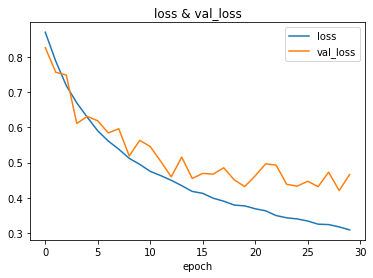

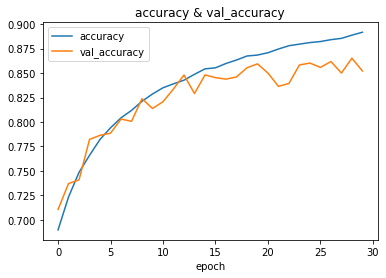

In [ ]:
history_df = pd.DataFrame(cnn_info.history)
history_df[["loss", "val_loss"]].plot(title="loss & val_loss", xlabel="epoch")
history_df[["accuracy", "val_accuracy"]].plot(title="accuracy & val_accuracy", xlabel="epoch")

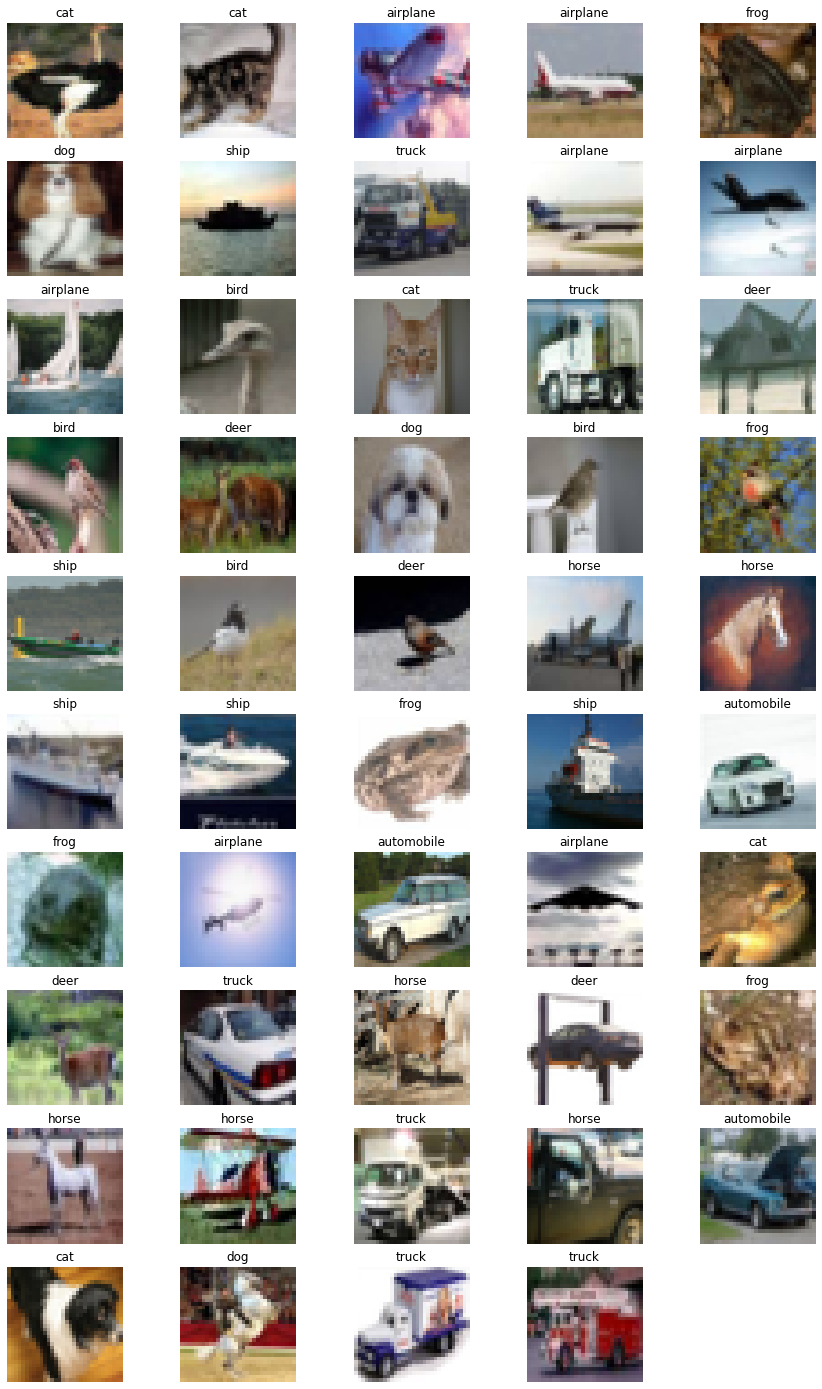

In [ ]:
# CNN으로 학습한 모델이 실제로 맞게 예측하는지 확인
# 정확도가 낮을수록 사진 구별을 제대로 못하는것을 확인할 수 있음
# https://www.kaggle.com/code/wissemch/cifar10-cnn/notebook
import random
plt.figure(figsize=(15,25))
n_test = x_test.shape[0]

for i in range(1,50) :
    ir = random.randint(0,n_test)
    plt.subplot(10,5,i)
    plt.axis('off')
    plt.imshow(x_test[ir])
    pred_classes = y_pred_classes[ir]
    plt.title(cifar10_label[pred_classes])

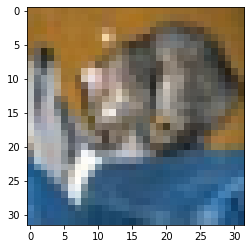

In [ ]:
# plt.imshow(x_test[0])

# 테스트

32768/19117 [===================================================] - 0s 0us/step


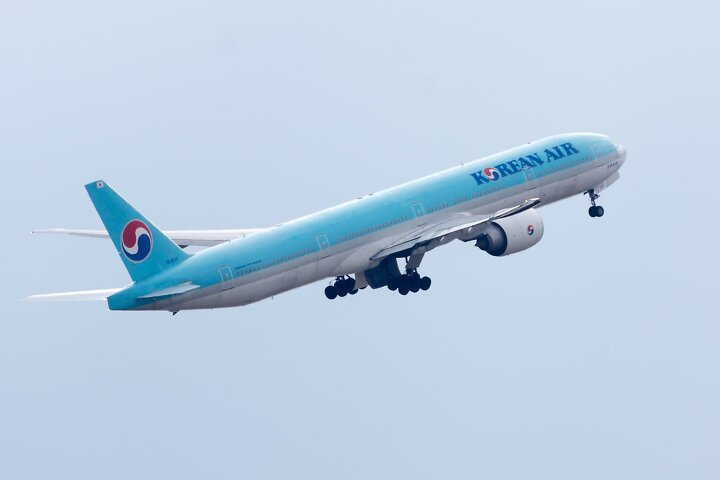

In [6]:
import matplotlib.cm as cm

model_builder = keras.applications.xception.Xception
img_size = (32, 32)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_8"

# The local path to our target image
# img_path = keras.utils.get_file(
#     "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
# )

img_path = keras.utils.get_file(
# "cat_and_dog.jpg",
  "airplane.jpg",
  "https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/STq/image/cPsjJEdhMex2vgEASbVwWbAhAOg"
#     "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg",
)

# img_path = keras.utils.get_file(
#   "4.jpg", "https://raw.githubusercontent.com/YoongiKim/CIFAR-10-images/master/train/airplane/0231.jpg"
#  )

display(Image(img_path))

In [ ]:
# img_path.siz
# img = np.reshape(img_path, (1, 28, 28))
# predict = cnn.predict(img_size)  # inference

In [7]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [cnn.inputs], [cnn.get_layer(last_conv_layer_name).output, cnn.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


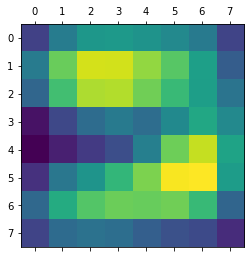

In [8]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
# model = model_builder(weights="imagenet")
model = cnn
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [11]:
pca = PCA()#n_components=10)
# pca_data = pca.fit_transform(t.trainable_variables)

# plt.figure( figsize=(15,15) )
# # plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='tab10', s=10)
# plt.show()
# print(pca_data)

t = cnn.get_layer('conv2d')
# t.output
print(type(t.trainable_variables))


<class 'list'>


In [ ]:
# 예시 이미지 예측률 -> 잘나옴 ㅇㅇ
img_array
predict = model.predict(img_array)  # inference
print(predict)

[[ 12.766334    2.6579928  -2.5175629  -2.8397563 -11.121258   -6.3221784
   -7.364345   -7.3262024  -3.8538413  -3.2076943]]


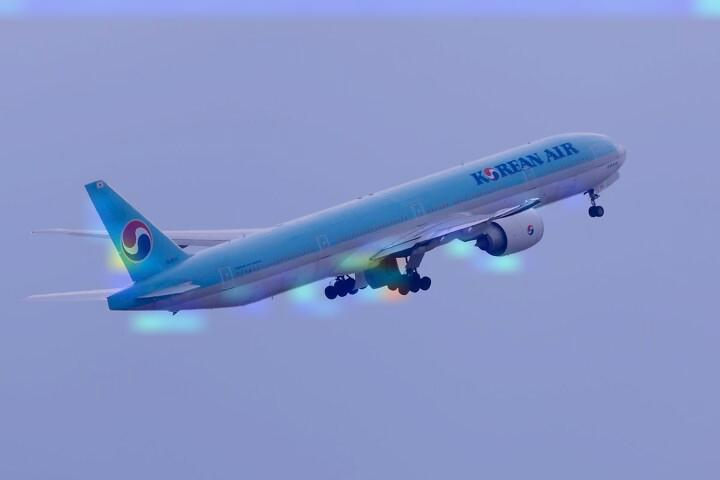

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

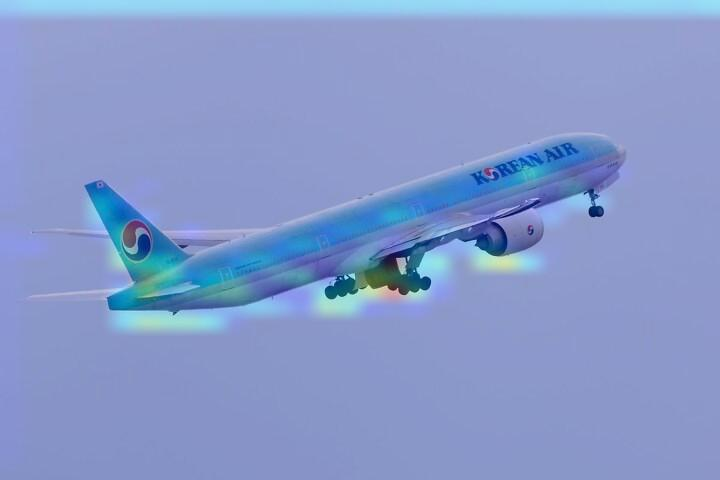

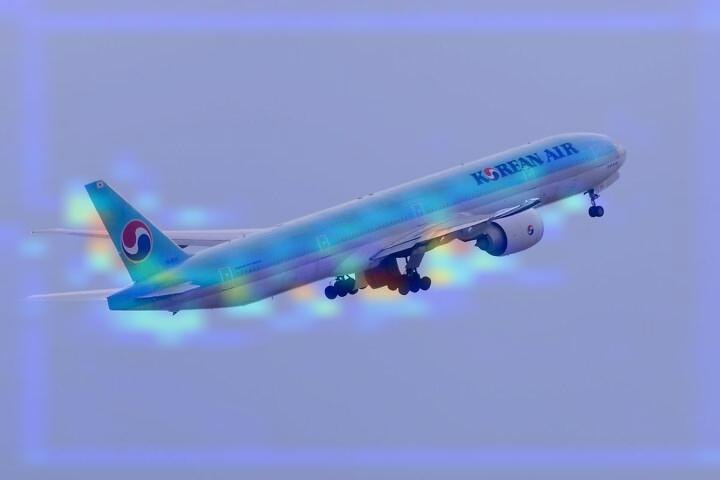

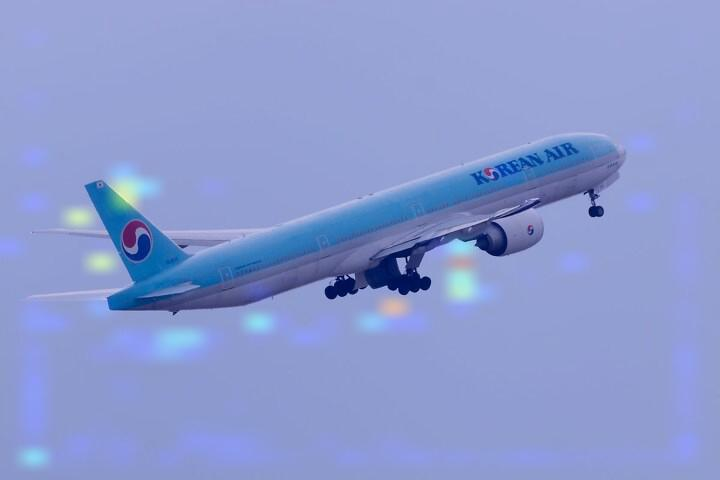

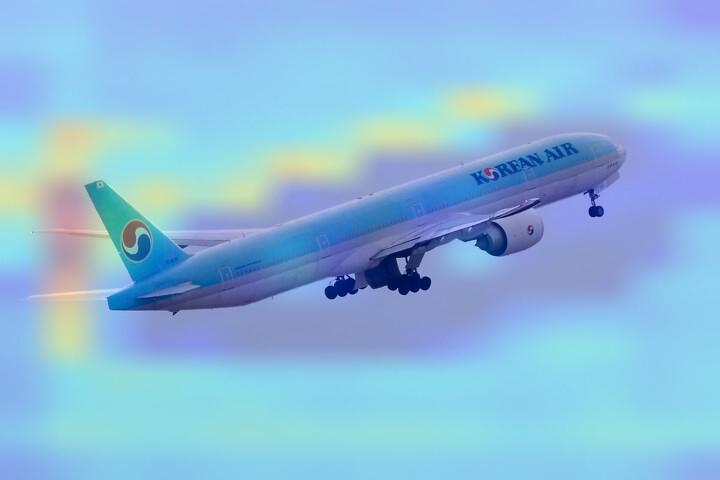

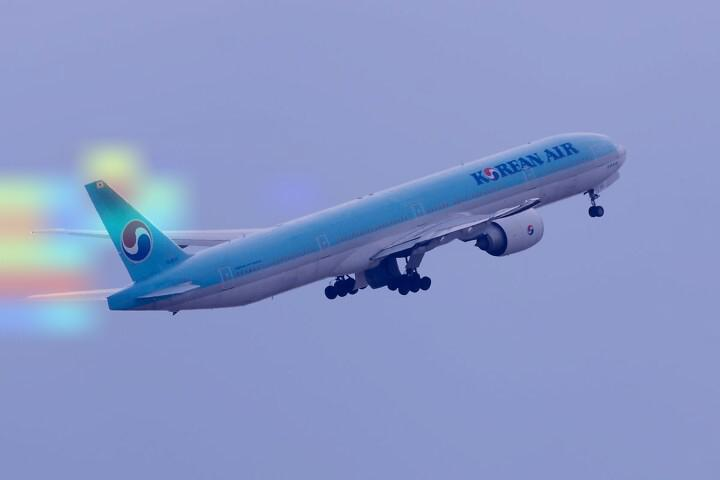

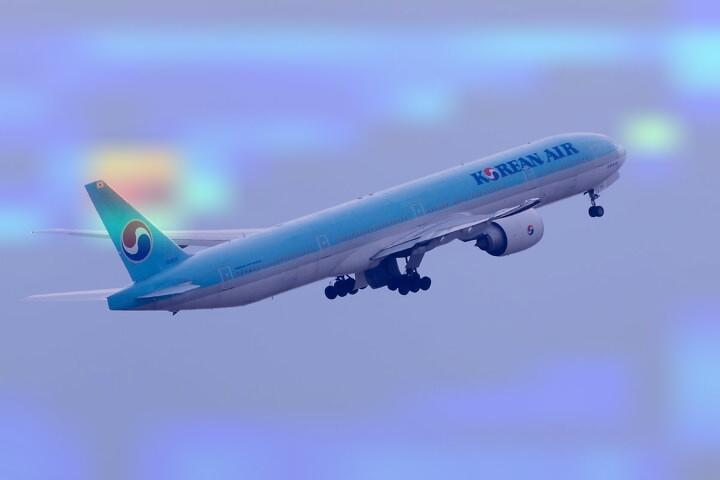

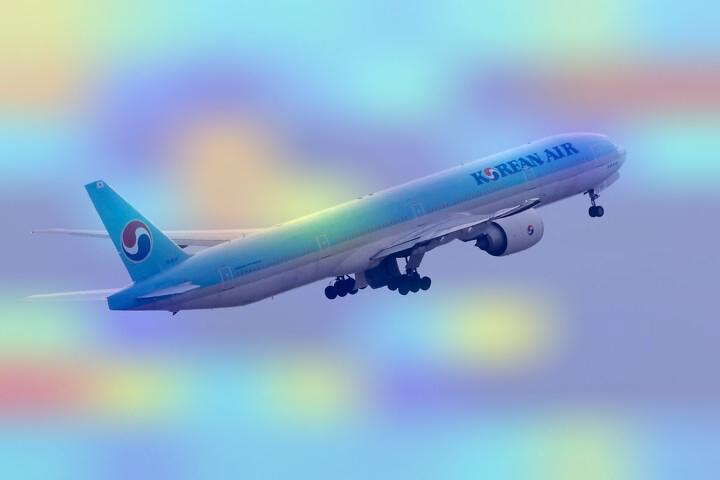

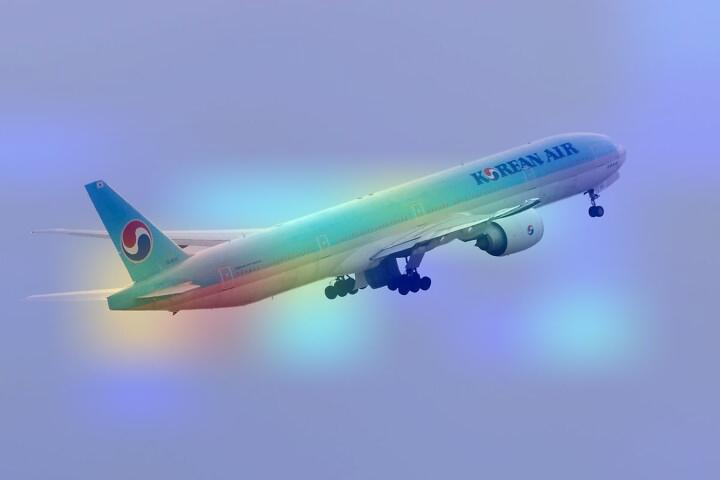

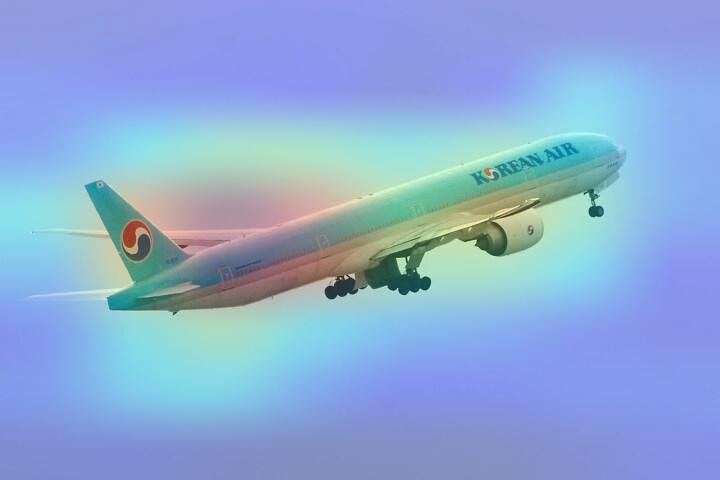

In [ ]:
pred_index=0
for i in range(9):
  if i == 0:
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d', pred_index=pred_index)
  else:
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_' + '%d' %i, pred_index=pred_index)
  save_and_display_gradcam(img_path, heatmap)

# 본인의 손글씨 직접 테스트 해보기

In [ ]:
import cv2
from PIL import Image

Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# import cv2
# import matplotlib.pyplot
# img = cv2.imread('./drive/My Drive/5.png', cv2.IMREAD_GRAYSCALE)
# img = 255 - cv2.resize(img, (28, 28))
# plt.imshow(img)

AttributeError: ignored

Local(conda)

cv2

In [ ]:
# # 이미지 load
# img = cv2.imread('./data/mydata.png', cv2.IMREAD_GRAYSCALE)
# plt.imshow(img)

In [ ]:
# # mnist 처럼 값 변경 (resizing, 0~1 normalization, 배경 픽셀값을 0으로)
# img = (255 - cv2.resize(img, (28, 28))) / 255
# plt.imshow(img)

In [ ]:
img.shape

In [ ]:
img

PIL.Image

In [ ]:
# 이미지 load
img = Image.open("./drive/My Drive/data.png")

plt.imshow(img)

In [ ]:
# mnist 처럼 값 변경(resizing, 0~1 정규화, 배경 픽셀값을 0으로)
img = img.resize((28, 28))
img = np.asarray(img)
img = (255 - img) / 255

In [ ]:
img = np.asarray(img)
img.shape

In [ ]:
# (28, 28, 3) -> (28, 28)

# color -> 평균값 하여 gray scale
img = np.mean(img, axis=2)

# 화면에 출력하여 확인
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
img

In [ ]:
# shape을 변경(batch)하여 학습된 model에 넣고 결과 확인
img = np.reshape(img, (1, 28, 28))
predict = model.predict(img)  # inference

print("\nModel이 예측한 값은 {} 입니다.".format(np.argmax(predict, -1).item()))